Demo to particle track in  port phillip bay Schism 
1) build parameter dictionary
2) run oceantracker
3) plot results


In [1]:
# top level params
params = {'shared_params': {'output_file_base': 'PPBtest',
                                'root_output_dir': 'F:\\OceanTrackerOuput\\Deakin\\portPhillipBay',  # change to suir
                                },
              'reader': {'class_name': 'oceantracker.reader.schism_reader.SCHSIMreaderNCDF', 
                         'input_dir': r'F:\Hindcasts\Hindcast_samples_tests\Deakin_EricT\PPB_Hydro_netCDF',   # change to local source 
                         'file_mask': 'schout_*.nc',
                         'cords_in_lat_long': True,
                         },
           
              }
# case parameters
params['base_case_params'] = {'run_params': {
        'duration': 7. * 24 * 3600,                      # 1 week run
        'write_tracks': True},
        'tracks_writer': {'output_step_count': 6},
        'solver': {'screen_output_step_count': 1, 'n_sub_steps': 6},
        'dispersion': {'A_H': 1.0, 'A_V': 0.001},
                                        # add a decainng particle property with 1 day decay scale to simulate eDNA
        'particle_properties':[{'name' :'eDNA', 'class_name': 'oceantracker.particle_properties.age_decay.AgeDecay', 'decay_time_scale': 1. * 3600 * 24}],
                        # make heatmap for each release group very hour, incule a eDNA heat map as well
        'particle_statistics': [{
                'class_name': 'oceantracker.particle_statistics.gridded_statistics.GriddedStats2D_timeBased',
                'calculation_interval': 3600, 'particle_property_list': ['eDNA'],
                'release_group_centered_grids': True,
                'grid_span': [25000., 25000.],
                'grid_size': [150, 151]}],
         'particle_release_groups': []  # initial empty relese group lists    
    }

# set up one release group per release location to allow heat maps for each point and ad toe rease group list
# this allows one heat map to be built for each point release location
x0 = [[312197, 5795541],
        [294455, 5758887],
        ]

for x in x0:
    # release 150 particles every 30min
    params['base_case_params']['particle_release_groups'].append({'points': [x], 'pulse_size': 150, 'release_interval': 1800})


#show full  params 
import json
print(json.dumps(params, indent=4))


{
    "shared_params": {
        "output_file_base": "PPBtest",
        "root_output_dir": "F:\\OceanTrackerOuput\\Deakin\\portPhillipBay"
    },
    "reader": {
        "class_name": "oceantracker.reader.schism_reader.SCHSIMreaderNCDF",
        "input_dir": "F:\\Hindcasts\\Hindcast_samples_tests\\Deakin_EricT\\PPB_Hydro_netCDF",
        "file_mask": "schout_*.nc",
        "cords_in_lat_long": true
    },
    "base_case_params": {
        "run_params": {
            "duration": 604800.0,
            "write_tracks": true
        },
        "tracks_writer": {
            "output_step_count": 6
        },
        "solver": {
            "screen_output_step_count": 1,
            "n_sub_steps": 6
        },
        "dispersion": {
            "A_H": 1.0,
            "A_V": 0.001
        },
        "particle_properties": [
            {
                "name": "eDNA",
                "class_name": "oceantracker.particle_properties.age_decay.AgeDecay",
                "decay_time_scale": 864

2) Run Ocean tracker

the run_info_file_name returned helps with reading output, run_info file is a json that has information on all the cases and output file names

In [2]:
from oceantracker import main

# run oceantracker
run_info_file_name, has_errors= main.run(params)



--OceanTracker preliminary set up
M: --------------------------------------------------------------------------
M: Starting OceanTracker  Version 0.3.04.004 2023-03-29
M:   Python version: 3.10.8 | packaged by conda-forge | (main, Nov 24 2022, 14:07:00) [MSC v.1916 64 bit (AMD64)]
M: --------------------------------------------------------------------------
M: --------------------------------------------------------------------------
M:   - Running OceanTracker started 2023-04-27 10:02:49.857970
M:   - Starting: PPBtest
M:   - Sorting hydro-model files in time order
M: >>> Note:  3D Schism velocity variable "hvel" not in hydo-model trying to run in depth average mode using "dahv" variable
M:         - Finished sorting  2 hydro-model  files 
M:   - Input directory: F:\Hindcasts\Hindcast_samples_tests\Deakin_EricT\PPB_Hydro_netCDF
M: --------------------------------------------------------------------------
P001: --------------------------------------------------------------------------


3) read and plot output

    a) first basic tracks

runinfo file F:\OceanTrackerOuput\Deakin\portPhillipBay\PPBtest\PPBtest_runInfo.json False
caseinfo file= F:\OceanTrackerOuput\Deakin\portPhillipBay\PPBtest\PPBtest_caseInfo.json
dict_keys(['dimensions', 'total_num_particles_released', 'x', 'IDpulse', 'status', 'IDrelease_group', 'time', 'dry_cell_index', 'x0', 'grid', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'axis_lim'])


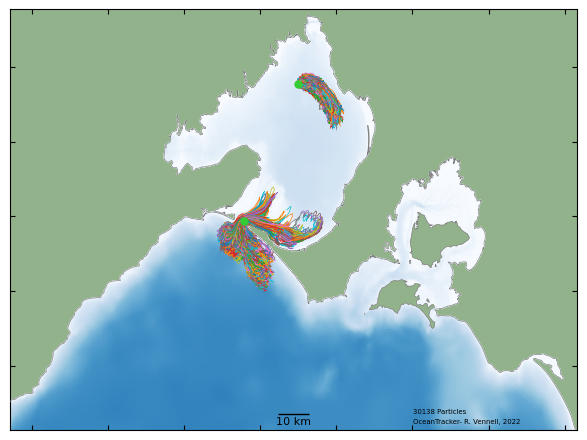

In [3]:
# check on results file names
print('runinfo file', run_info_file_name, has_errors)

from oceantracker.post_processing.read_output_files import  load_output_files

# from run info get case info json file, which holds all the output file names for each case (only one case in this example)
case_info_file_name  = load_output_files.get_case_info_file_from_run_file(run_info_file_name)
print('caseinfo file=', case_info_file_name)

# read in 2% sample of tracks for plotting 
tracks = load_output_files.load_particle_track_vars(case_info_file_name, fraction_to_read=0.02)
print(tracks.keys()) # show what is in tracks data

from oceantracker.post_processing.plotting.plot_tracks import plot_tracks

ax1=[ 217641,      404133,     5702747,     5815571] # limit to see both release groups
plot_tracks(tracks, axis_lims=ax1)

Show a heat map od decayiny particle property eDNA

dict_keys(['total_num_particles_released', 'limits', 'time_var', 'stats_type', 'count', 'time', 'y', 'x', 'sum_eDNA', 'eDNA', 'info', 'release_group_centered_grids', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'grid'])


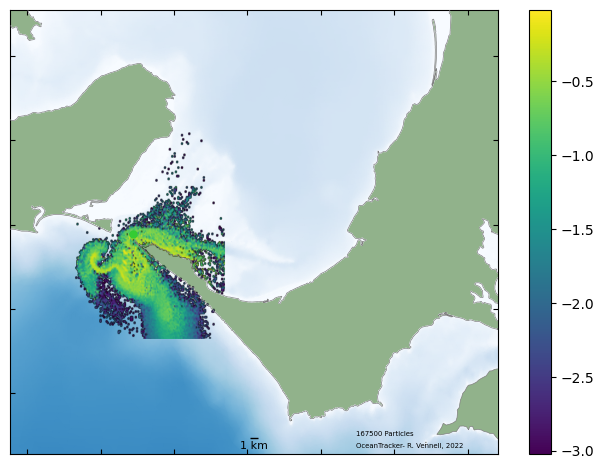

In [4]:

# Read gridded stats file
heatmap= load_output_files.load_stats_file(case_info_file_name,var_list=['eDNA']) # Read decaying partcle heat map
print(heatmap.keys())

from oceantracker.post_processing.plotting.plot_statistics import plot_heat_map
dx=60000
ax2=[ 217641+dx,      404133-dx,     5702747+dx/2,     5815571-dx/2]

# plot last time step of edna heat map for first release group
plot_heat_map(heatmap,var='eDNA', axis_lims=ax2,nt=-1, release_group=0, logscale=True)

add aminations, 
play movie when done

these require aditional  install of ffpeg

  ``conda install -c conda-forge ffmpeg``
  

In [8]:
%matplotlib
from IPython.display import HTML


from matplotlib import pyplot as plt
from oceantracker.post_processing.plotting.plot_tracks import animate_particles

# need to do amination in seperate window

# animate particles
anim = animate_particles(tracks, axis_lims=ax2,
                         title='Port Phillip bay test',
                        show_dry_cells=False)

# this is slow to build! 
HTML(anim.to_html5_video())

Using matplotlib backend: <object object at 0x0000012420740E20>
